##==================================================================##
##        File: Electrochemical-plots.ipynb
##      Author: GOTTFRID OLSSON 
##     Created: 2024-04-24
##     Updated: 2024-05-08
##       About: Reads .txt files of electrochemical cycling of cells
##              and plots the data for the Master's Thesis [TIFX05].
##              Note: the name 'M-cell' is here used. In the thesis
##              these cells are called the 'I-cell's.
##==================================================================##

In [16]:
# LIBRARIES #
%matplotlib inline
import matplotlib
import numpy as np
import CSV_handler as CSV
import plot_functions as f
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset 


In [17]:
# PLOT SETTINGS #

fig_width_cm  = 16 #assumes A4-paper with margins=2.5cm on both right and left side
fig_height_cm = 9

font_size_axis   = 13
font_size_tick   = 11
font_size_legend = 9

grid_major = False
grid_minor = False
legend_on  = True

f.set_LaTeX_and_CMU(True) #must run before plotting
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')

three_grayscale_colors = ['#000000', '#595959', '#B2B2B2'] # with 35%-point increase in "value" (in HSV) 
five_grayscale_colors  = ['#000000', '#333333', '#666666', '#999999', '#cccccc'] #with 30% saturation difference = good contrast
four_grayscale_colors  = ['#000000', '#3F3F3F', '#7F7F7F', '#BFBFBF'] # with 25%-point increase in "value" (in HSV) 
markers      = ['^',    'o',    's',   'X',     'D',   '.']
marker_sizes = [3.3,    3.3,    3.3,    3.6,    3,      3.3]

standard_text_box_settings = dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor=five_grayscale_colors[4]) #edgecolor, facecolor, alpha as to match legend 

DONE: set_LaTeX_and_CMU: True


In [18]:
# FUNCTIONS #

def shift_df_column_to_start_at_zero(df_column):
    df_column_shift_value = df_column[0]
    return df_column - df_column_shift_value


def try_get_column_from_df(df, column_name_string):
    try:
        column = df.loc[:,column_name_string]
    except:
        print("EXCEPTION: No column with name {column_name_string} (instead returns value None).")
        column = None
    return column


def get_t_V_I_error_from_Biologic_file_root_path(root_path, shift_t_to_zero=False):
    df = CSV.read(root_path, delimiter='\t') #tab separated from Biologic

    t = try_get_column_from_df(df, "time/s")
    if shift_t_to_zero:
        try:
            t = shift_df_column_to_start_at_zero(t)
        except:
            print("EXCEPTION: Could not perform shift_df_column_to_start_at_zero().")

    V = try_get_column_from_df(df, "Ewe/V")
    I = try_get_column_from_df(df, "I/mA")
    e = try_get_column_from_df(df, "error")

    return [t, V, I, e]
    

def calculate_deposited_amount_mAhcm2_from_t_I(t, I):
    # assumes data in units 'time/s' and 'current/mA' as well as an electrode area of 0.196 cm2 (Li, 5 mm diameter)
    A = 0.196       # cm2
    t_hour = t/3600 # h (hour)
    J = np.abs(I)/A # mA/cm2; abs to avoid negative capacity
    C = J*t_hour    # mAh/cm2
    return C    


def get_current_date_and_time_as_ISO8601_string():
    import datetime
    date_and_time = datetime.datetime.now().strftime("%Y%m%dT%H%M%S")
    return date_and_time


In [19]:
# Root paths #
SEIDEP_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Cell-cycling\\SEIDEP\\'
JP_root_path     = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Cell-cycling\\JP-measurements\\'
E_root_path      = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\cell-cycling\\E-measurements\\'

T_cell_path = 'T-cell\\'
M_cell_path = 'M-cell\\'
C_cell_path = 'C-cell\\'

electrochemical_figures_export_root_path = 'C:\\MASTER-THESIS\\FIGURES\\Electrochemical-plots\\'

In [20]:
# Paths for data SEIDEP-measurements #

# SEIDEP: Deposition of Li after a 0.010 V hold and reaching a certain value of i_SEI / i_deposition (= \sigma)
# sigma_x, _0x, _00x means: sigma = x, 0.x, or 0.0x
SEIDEP_sigma_1_MB_path   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt' # SEI-formation
SEIDEP_sigma_1_CP_path   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt' # Li-deposition
SEIDEP_sigma_05_MB_path = SEIDEP_root_path + '2024-05-01_SEIDEP-6_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.5_02_MB_C05.txt'
SEIDEP_sigma_05_CP_path = SEIDEP_root_path + '2024-05-01_SEIDEP-6_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.5_03_CP_C05.txt'
SEIDEP_sigma_02_MB_path = SEIDEP_root_path + '2024-05-01_SEIDEP-7_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.2_02_MB_C06.txt'
SEIDEP_sigma_02_CP_path = SEIDEP_root_path + '2024-05-01_SEIDEP-7_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.2_03_CP_C06.txt'
SEIDEP_sigma_01_MB_path  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt'
SEIDEP_sigma_01_CP_path  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt'
SEIDEP_sigma_005_MB_path = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt'
SEIDEP_sigma_005_CP_path = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C05.txt'
SEIDEP_sigma_005_MB_path_2 = SEIDEP_root_path + '2024-05-16_SEIDEP-8_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.05_02_MB_C11.txt'
SEIDEP_sigma_005_CP_path_2 = SEIDEP_root_path + '2024-05-16_SEIDEP-8_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.05_03_CP_C11.txt'


SEIDEP_sigma_1_MB   = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_1_MB_path,   shift_t_to_zero=True)
SEIDEP_sigma_1_CP   = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_1_CP_path,   shift_t_to_zero=True)
SEIDEP_sigma_05_MB  = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_05_MB_path,  shift_t_to_zero=True)
SEIDEP_sigma_05_CP  = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_05_CP_path,  shift_t_to_zero=True)
SEIDEP_sigma_02_MB  = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_02_MB_path,  shift_t_to_zero=True)
SEIDEP_sigma_02_CP  = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_02_CP_path,  shift_t_to_zero=True)
SEIDEP_sigma_01_MB  = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_01_MB_path,  shift_t_to_zero=True)
SEIDEP_sigma_01_CP  = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_01_CP_path,  shift_t_to_zero=True)
SEIDEP_sigma_005_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_005_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_CP_path, shift_t_to_zero=True)
SEIDEP_sigma_005_MB_2 = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_MB_path_2, shift_t_to_zero=True)
SEIDEP_sigma_005_CP_2 = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_CP_path_2, shift_t_to_zero=True)

SEIDEP_sigma_1_CP_deposited_amount   = calculate_deposited_amount_mAhcm2_from_t_I(SEIDEP_sigma_1_CP[0],   SEIDEP_sigma_1_CP[2])*1000   #muAh/cm2
SEIDEP_sigma_05_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(SEIDEP_sigma_05_CP[0],  SEIDEP_sigma_05_CP[2])*1000   #muAh/cm2
SEIDEP_sigma_02_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(SEIDEP_sigma_02_CP[0],  SEIDEP_sigma_02_CP[2])*1000  #muAh/cm2
SEIDEP_sigma_01_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(SEIDEP_sigma_01_CP[0],  SEIDEP_sigma_01_CP[2])*1000  #muAh/cm2
SEIDEP_sigma_005_CP_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(SEIDEP_sigma_005_CP[0], SEIDEP_sigma_005_CP[2])*1000 #muAh/cm2
SEIDEP_sigma_005_CP_2_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(SEIDEP_sigma_005_CP_2[0], SEIDEP_sigma_005_CP_2[2])*1000 #muAh/cm2



DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\SEIDEP\2024-05-01_SEIDEP-6_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.5_02_MB_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\SEIDEP\2024-05-01_SEIDEP-6_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.5_03_CP_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\SEIDEP\2024-05-01_SEIDEP-7_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_sigma-0.2_02_MB_C06.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\SEIDEP\2024-05-01_SEIDEP-7_T-cell_Li-Cu_1-mm-PP-space

0 5 (-0.196, 1.0, 25.97, 196) -0.196 1.0 25.97
1 5 (-0.098, 0.5, 101.05, 98.0) -0.098 0.5 101.05
2 5 (-0.0392, 0.2, 620.5, 39.2) -0.0392 0.2 620.5
3 5 (-0.0196, 0.1, 2074.25, 19.6) -0.0196 0.1 2074.25
4 5 (-0.0098, 0.05, 7210.4, 9.82) -0.0098 0.05 7210.4
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.8333333333333334, 123.33333333333333) and y=(-510.0, 10.0) on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, lower right, on axs: None
DONE: align_labels
DONE: set_layout_tight
DONE: export_figure_as_pdf: C:\MASTER-THESIS\FIGURES\Electrochemical-plots\SEIDEP\SEI-formation_I-vs-t_T-cell_different-sigma_20240603T151128.pdf

T-cells, SEI-formation, E_we=0.010 V, different $\sigma$


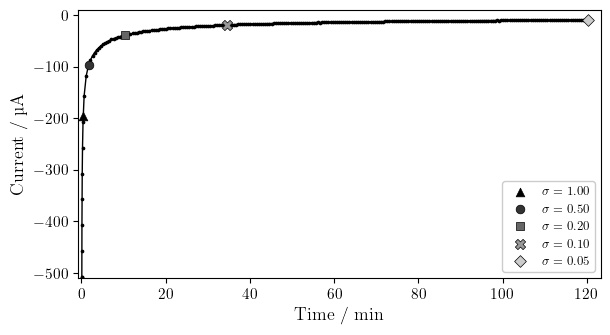

In [88]:
# PLOT SEIDEP: I vs. t (T-cells) #
# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)


# Plot data (axs.plot, .errorbar, .hist, ...) # SEIDEP_sigma_x_MB = [t, V, I, error]
time_divider = 60 # s --> min if = 60
current_multiplier = 1000 # mA --> muA
first_datapoint_remover = 1 
I_sigma_t_ISEIcutoff = [(-0.196,  1.00, 25.97, 196),
                        (-0.098,  0.50, 101.05, 98.0),
                        (-0.0392, 0.20, 620.5, 39.2),
                        (-0.0196, 0.10, 2074.25, 19.6),
                        (-0.0098, 0.05, 7210.4, 9.82)] # (mA, unitless, s, |muA|) (time values by zooming in on graph, SEIDEP_sigma_005_MB) to plot the markers of sigma

#axs.plot(SEIDEP_sigma_1_MB[0][first_datapoint_remover:-1]/time_divider,   SEIDEP_sigma_1_MB[2][first_datapoint_remover:-1]*current_multiplier,   linewidth=1, linestyle='-', color='r', marker=markers[0], markersize='3.3')#, label='$\\sigma=1.00$')
#axs.plot(SEIDEP_sigma_05_MB[0][first_datapoint_remover:-1]/time_divider,  SEIDEP_sigma_05_MB[2][first_datapoint_remover:-1]*current_multiplier,  linewidth=1, linestyle='-', color='g', marker=markers[1], markersize='3.3')#, label='$\\sigma=0.50$')
#axs.plot(SEIDEP_sigma_02_MB[0][first_datapoint_remover:-1]/time_divider,  SEIDEP_sigma_02_MB[2][first_datapoint_remover:-1]*current_multiplier,  linewidth=1, linestyle='-', color='g', marker=markers[2], markersize='3.3')#, label='$\\sigma=0.20$')
#axs.plot(SEIDEP_sigma_01_MB[0][first_datapoint_remover:-1]/time_divider,  SEIDEP_sigma_01_MB[2][first_datapoint_remover:-1]*current_multiplier,  linewidth=1, linestyle='-', color='g', marker=markers[3], markersize='3.3')#, label='$\\sigma=0.10$')
axs.plot(SEIDEP_sigma_005_MB[0][first_datapoint_remover:-1]/time_divider, SEIDEP_sigma_005_MB[2][first_datapoint_remover:-1]*current_multiplier, linewidth=1, linestyle='-', color=five_grayscale_colors[0], marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
#for i in range(len(I_sigma_t_ISEIcutoff)):
#    axs.hlines(I_sigma_t_ISEIcutoff[i][0]*current_multiplier, xmin=0, xmax=10000, color='r', linestyle='-')
labels_ISEIcutoff = ["", "", "", "", ""]
labels_sigmas = ["", "", "", "", ""]

###ax_inset = inset_axes(axs, width="100%", height="100%", ##ax_inset = inset_axes(axs, width="60%", height="50%", loc='center')
###                      bbox_to_anchor=(.28, .18, .68, .60), bbox_transform=axs.transAxes, loc=3)#loc='lower right', borderpad=2*font_size_tick/10)# loc=(0.5,0.5))#"lower center")
#ax_inset.plot(SEIDEP_sigma_1_MB[0][first_datapoint_remover:-1]/time_divider, SEIDEP_sigma_1_MB[2][first_datapoint_remover:-1]*current_multiplier, linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label='$\\sigma=0.10$')
#ax_inset.plot(SEIDEP_sigma_01_MB[0][first_datapoint_remover:-1]/time_divider, SEIDEP_sigma_01_MB[2][first_datapoint_remover:-1]*current_multiplier, linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label='$\\sigma=1.00$')
###ax_inset.plot(SEIDEP_sigma_005_MB[0][first_datapoint_remover:-1]/time_divider, SEIDEP_sigma_005_MB[2][first_datapoint_remover:-1]*current_multiplier, linewidth=1, linestyle='-', color=five_grayscale_colors[0], marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=10.0$')
for i in range(len(I_sigma_t_ISEIcutoff)):
    print(i, len(I_sigma_t_ISEIcutoff), I_sigma_t_ISEIcutoff[i], I_sigma_t_ISEIcutoff[i][0], I_sigma_t_ISEIcutoff[i][1], I_sigma_t_ISEIcutoff[i][2])
    label_i = f'$\\sigma={I_sigma_t_ISEIcutoff[i][1]:.2f}$' #old
    labels_sigmas[i] = label_i
    #label_i = "$I_\\mathrm{SEI\\textrm{-}cutoff}=\\,\\,$" + f'{I_sigma_t_ISEIcutoff[i][3]}' + "\\,\\textmu A" #for presentation
    #labels_ISEIcutoff[i] = label_i
    s = [39, 39, 39, 55, 36]
    axs.scatter(I_sigma_t_ISEIcutoff[i][2]/time_divider,      I_sigma_t_ISEIcutoff[i][0]*current_multiplier, color=five_grayscale_colors[i], edgecolors= "black", linewidths=0.5, marker=markers[i], s=s[i], label=label_i, zorder=100)
    ###ax_inset.scatter(I_sigma_t_ISEIcutoff[i][2]/time_divider, I_sigma_t_ISEIcutoff[i][0]*current_multiplier, color=five_grayscale_colors[i], edgecolors= "black", linewidths=0.5, marker=markers[i], s=s[i], label=label_i, zorder=100)

xmin_inset, xmax_inset, ymin_inset, ymax_inset = 500/time_divider, 7360/time_divider, -0.041*current_multiplier, -0.006*current_multiplier
###ax_inset.set_xlim(xmin_inset, xmax_inset)
###ax_inset.set_ylim(ymin_inset, ymax_inset)


# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / min', y_label='Current / \\textmu A')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-50/time_divider, xmax=7400/time_divider, ymin=-0.51*current_multiplier, ymax=0.01*current_multiplier)
#f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
#f.set_grid(         ax_inset, grid_major_on=True, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='lower right')
f.align_labels(fig)
f.set_layout_tight(fig)

#mark_inset(axs, ax_inset, loc1=2, loc2=1, facecolor="none", edgecolor="0.05", linewidth=0.95, zorder=101)# draw a bbox of the region of the inset axes in the parent axes and connecting lines between the bbox and the inset axes area

PDF_path_SEIDEP_T_cell = electrochemical_figures_export_root_path + 'SEIDEP\\SEI-formation_I-vs-t_T-cell_different-sigma_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_SEIDEP_T_cell)
print('\nT-cells, SEI-formation, E_we=0.010 V, different $\\sigma$')
plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.21, 0.01) on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, lower right, on axs: None
DONE: align_labels
DONE: set_layout_tight
DONE: export_figure_as_pdf: C:\MASTER-THESIS\FIGURES\Electrochemical-plots\SEIDEP\Deposition_V-vs-C_T-cell_different-sigma_20240603T151638.pdf

T-cells, Li-deposition, J=1mA/cm2, different $\sigma$


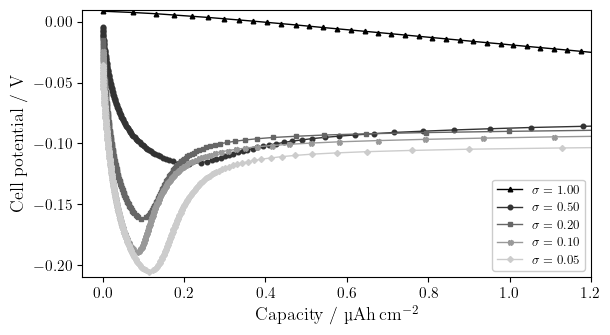

In [111]:
# PLOT SEIDEP: V vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...) # SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(SEIDEP_sigma_1_CP_deposited_amount,   SEIDEP_sigma_1_CP[1],   linewidth=1, linestyle='-', color=five_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=labels_sigmas[0])
axs.plot(SEIDEP_sigma_05_CP_deposited_amount,  SEIDEP_sigma_05_CP[1],  linewidth=1, linestyle='-', color=five_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label=labels_sigmas[1])
axs.plot(SEIDEP_sigma_02_CP_deposited_amount,  SEIDEP_sigma_02_CP[1],  linewidth=1, linestyle='-', color=five_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label=labels_sigmas[2])
axs.plot(SEIDEP_sigma_01_CP_deposited_amount,  SEIDEP_sigma_01_CP[1],  linewidth=1, linestyle='-', color=five_grayscale_colors[3], marker=markers[3], markersize=marker_sizes[3], label=labels_sigmas[3])
axs.plot(SEIDEP_sigma_005_CP_deposited_amount, SEIDEP_sigma_005_CP[1], linewidth=1, linestyle='-', color=five_grayscale_colors[4], marker=markers[4], markersize=marker_sizes[4], label=labels_sigmas[4])
#axs.plot(SEIDEP_sigma_005_CP_2_deposited_amount, SEIDEP_sigma_005_CP_2[1], linewidth=1, linestyle='-', color=five_grayscale_colors[4], marker=markers[4], markersize=marker_sizes[4], label='$\\sigma=0.05$ extra')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.05, xmax=1.2, ymin=-0.21, ymax=0.01)  # xmax=50.05, ymin=-0.21, ymax=0.01) 
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='lower right')
f.align_labels(fig)
f.set_layout_tight(fig)

PDF_path_SEIDEP_V_vs_C_different_sigma = electrochemical_figures_export_root_path + 'SEIDEP\\Deposition_V-vs-C_T-cell_different-sigma_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_SEIDEP_V_vs_C_different_sigma)
print('\nT-cells, Li-deposition, J=1mA/cm2, different $\\sigma$')
plt.show()

In [112]:
# Paths for data JP-measurements #

# CP #
A1_CP_path = JP_root_path + T_cell_path + '2024-04-25_JP-A1-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C05.txt'
A2_CP_path = JP_root_path + T_cell_path + '2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt'
A3_CP_path = JP_root_path + T_cell_path + '2024-04-23_JP-A3-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt'

A4_CP_path = JP_root_path + M_cell_path + '2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_04_CP_C11.txt'
A5_CP_path = JP_root_path + M_cell_path + '2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_04_CP_C10.txt'
A6_CP_path = JP_root_path + M_cell_path + '2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_04_CP_C11.txt'

A7_CP_path = JP_root_path + C_cell_path + '2024-04-23_JP-measurements_sample-A7-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C10.txt'
A8_CP_path = JP_root_path + C_cell_path + '2024-04-23_JP-measurements_sample-A8-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C11.txt'
A9_CP_path = JP_root_path + C_cell_path + '2024-04-23_JP-measurements_sample-A9-04_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C10.txt'

A55_CP_path = JP_root_path + M_cell_path + '2024-04-29_JP-measurements_sample-A5.5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax109.9mm_04_CP_C03.txt'
A85_CP_path = JP_root_path + C_cell_path + '2024-04-29_JP-measurements_sample-A8.5-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C03.txt'
A85_CP_path_2 = JP_root_path + 'C-cell_extra\\2024-05-16_JP-measurements_sample-A8.5-extra_C-cell_Cu-Li-Cellgard2400_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C13.txt'

A9_CP_lower_sigma_path = JP_root_path + M_cell_path + '2024-04-26_JP-measurements_sample-A6-03_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.002_added-OCV-0.1s_Deltax110.2mm_04_CP_C01.txt'

# small cutoff value during SEI-formation (basically lower sigma, but the same value, 392 nA, for all measurements)
A7_392nAcutoff_CP_path  = A7_CP_path
A8_392nAcutoff_CP_path  = JP_root_path + 'C-cell_392nA-cutoff\\' + '2024-05-01_JP-measurements_sample-A8_I-cutoff-392nA_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_added-OCV-0.1s_04_CP_C02.txt'
A85_392nAcutoff_CP_path = JP_root_path + 'C-cell_392nA-cutoff\\' + '2024-05-01_JP-measurements_sample-A8.5_I-cutoff-392nA_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_added-OCV-0.1s_04_CP_C03.txt'
A9_392nAcutoff_CP_path  = JP_root_path + 'C-cell_392nA-cutoff\\' + '2024-05-01_JP-measurements_sample-A9_I-cutoff-392nA_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_added-OCV-0.1s_04_CP_C02.txt'
A85_392nAcutoff_CP_path_2 = JP_root_path + 'C-cell_extra\\2024-05-16_JP-measurements_sample-A8.5-extra_I-cutoff-392nA_C-cell_Cu-Li-Cellgard2400_25muL-LiFSI-in-DME_outside-glovebox_added-OCV-0.1s_04_CP_C02.txt'


A1_CP  = get_t_V_I_error_from_Biologic_file_root_path(A1_CP_path,  shift_t_to_zero=True)
A2_CP  = get_t_V_I_error_from_Biologic_file_root_path(A2_CP_path,  shift_t_to_zero=True)
A3_CP  = get_t_V_I_error_from_Biologic_file_root_path(A3_CP_path,  shift_t_to_zero=True)
A4_CP  = get_t_V_I_error_from_Biologic_file_root_path(A4_CP_path,  shift_t_to_zero=True)
A5_CP  = get_t_V_I_error_from_Biologic_file_root_path(A5_CP_path,  shift_t_to_zero=True)
A55_CP = get_t_V_I_error_from_Biologic_file_root_path(A55_CP_path, shift_t_to_zero=True)
A6_CP  = get_t_V_I_error_from_Biologic_file_root_path(A6_CP_path,  shift_t_to_zero=True)
A7_CP  = get_t_V_I_error_from_Biologic_file_root_path(A7_CP_path,  shift_t_to_zero=True)
A8_CP  = get_t_V_I_error_from_Biologic_file_root_path(A8_CP_path,  shift_t_to_zero=True)
A85_CP = get_t_V_I_error_from_Biologic_file_root_path(A85_CP_path, shift_t_to_zero=True)
A9_CP  = get_t_V_I_error_from_Biologic_file_root_path(A9_CP_path,  shift_t_to_zero=True)
A85_CP_2 = get_t_V_I_error_from_Biologic_file_root_path(A85_CP_path_2, shift_t_to_zero=True)
A9_CP_lower_sigma  = get_t_V_I_error_from_Biologic_file_root_path(A9_CP_lower_sigma_path,  shift_t_to_zero=True)
A7_392nAcutoff_CP  = get_t_V_I_error_from_Biologic_file_root_path(A7_392nAcutoff_CP_path,  shift_t_to_zero=True)
A8_392nAcutoff_CP  = get_t_V_I_error_from_Biologic_file_root_path(A8_392nAcutoff_CP_path,  shift_t_to_zero=True)
A85_392nAcutoff_CP = get_t_V_I_error_from_Biologic_file_root_path(A85_392nAcutoff_CP_path, shift_t_to_zero=True)
A9_392nAcutoff_CP  = get_t_V_I_error_from_Biologic_file_root_path(A9_392nAcutoff_CP_path,  shift_t_to_zero=True)
A85_392nAcutoff_CP_2 = get_t_V_I_error_from_Biologic_file_root_path(A85_392nAcutoff_CP_path_2, shift_t_to_zero=True)

# MB #
A1_MB_path = JP_root_path + T_cell_path + '2024-04-25_JP-A1-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_02_MB_C05.txt'
A2_MB_path = JP_root_path + T_cell_path + '2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_02_MB_C10.txt'
A3_MB_path = JP_root_path + T_cell_path + '2024-04-23_JP-A3-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_02_MB_C10.txt'
A4_MB_path = JP_root_path + M_cell_path + '2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_02_MB_C11.txt'
A5_MB_path = JP_root_path + M_cell_path + '2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C10.txt'
A6_MB_path = JP_root_path + M_cell_path + '2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C11.txt'
A7_MB_path = JP_root_path + C_cell_path + '2024-04-23_JP-measurements_sample-A7-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C10.txt'
A8_MB_path = JP_root_path + C_cell_path + '2024-04-23_JP-measurements_sample-A8-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C11.txt'
A9_MB_path = JP_root_path + C_cell_path + '2024-04-23_JP-measurements_sample-A9-04_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C10.txt'

A1_MB = get_t_V_I_error_from_Biologic_file_root_path(A1_MB_path, shift_t_to_zero=True)
A2_MB = get_t_V_I_error_from_Biologic_file_root_path(A2_MB_path, shift_t_to_zero=True)
A3_MB = get_t_V_I_error_from_Biologic_file_root_path(A3_MB_path, shift_t_to_zero=True)
A4_MB = get_t_V_I_error_from_Biologic_file_root_path(A4_MB_path, shift_t_to_zero=True)
A5_MB = get_t_V_I_error_from_Biologic_file_root_path(A5_MB_path, shift_t_to_zero=True)
A6_MB = get_t_V_I_error_from_Biologic_file_root_path(A6_MB_path, shift_t_to_zero=True)
A7_MB = get_t_V_I_error_from_Biologic_file_root_path(A7_MB_path, shift_t_to_zero=True)
A8_MB = get_t_V_I_error_from_Biologic_file_root_path(A8_MB_path, shift_t_to_zero=True)
A9_MB = get_t_V_I_error_from_Biologic_file_root_path(A9_MB_path, shift_t_to_zero=True)

# Deposited amount frm t and I #
A1_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A1_CP[0],  A1_CP[2])*1000 #muAh/cm2
A2_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A2_CP[0],  A2_CP[2])*1000 #muAh/cm2
A3_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A3_CP[0],  A3_CP[2])*1000 #muAh/cm2
A4_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A4_CP[0],  A4_CP[2])*1000 #muAh/cm2
A5_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A5_CP[0],  A5_CP[2])*1000 #muAh/cm2
A55_CP_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(A55_CP[0],A55_CP[2])*1000 #muAh/cm2
A6_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A6_CP[0],  A6_CP[2])*1000 #muAh/cm2
A7_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A7_CP[0],  A7_CP[2])*1000 #muAh/cm2
A8_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A8_CP[0],  A8_CP[2])*1000 #muAh/cm2
A85_CP_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(A85_CP[0],A85_CP[2])*1000 #muAh/cm2
A9_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A9_CP[0],  A9_CP[2])*1000 #muAh/cm2
A85_CP_deposited_amount_2 = calculate_deposited_amount_mAhcm2_from_t_I(A85_CP_2[0],A85_CP_2[2])*1000 #muAh/cm2

A9_CP_lower_sigma_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A9_CP_lower_sigma[0],   A9_CP_lower_sigma[2])*1000 #muAh/cm2
A7_392nAcutoff_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A7_392nAcutoff_CP[0],   A7_392nAcutoff_CP[2])*1000 #muAh/cm2
A8_392nAcutoff_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A8_392nAcutoff_CP[0],   A8_392nAcutoff_CP[2])*1000 #muAh/cm2
A85_392nAcutoff_CP_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(A85_392nAcutoff_CP[0], A85_392nAcutoff_CP[2])*1000 #muAh/cm2
A9_392nAcutoff_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A9_392nAcutoff_CP[0],   A9_392nAcutoff_CP[2])*1000 #muAh/cm2
A85_392nAcutoff_CP_deposited_amount_2 = calculate_deposited_amount_mAhcm2_from_t_I(A85_392nAcutoff_CP_2[0], A85_392nAcutoff_CP_2[2])*1000 #muAh/cm2


DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\JP-measurements\T-cell\2024-04-25_JP-A1-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\JP-measurements\T-cell\2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\JP-measurements\T-cell\2024-04-23_JP-A3-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\JP-measurements\M-cell\2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_04_CP_C11.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Cell-cycling\JP-measurements\M-cell\2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-L

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 1.6) and y=(-0.47, 0.01) on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, center right, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 1.6) and y=(-0.47, 0.01) on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, center right, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x:

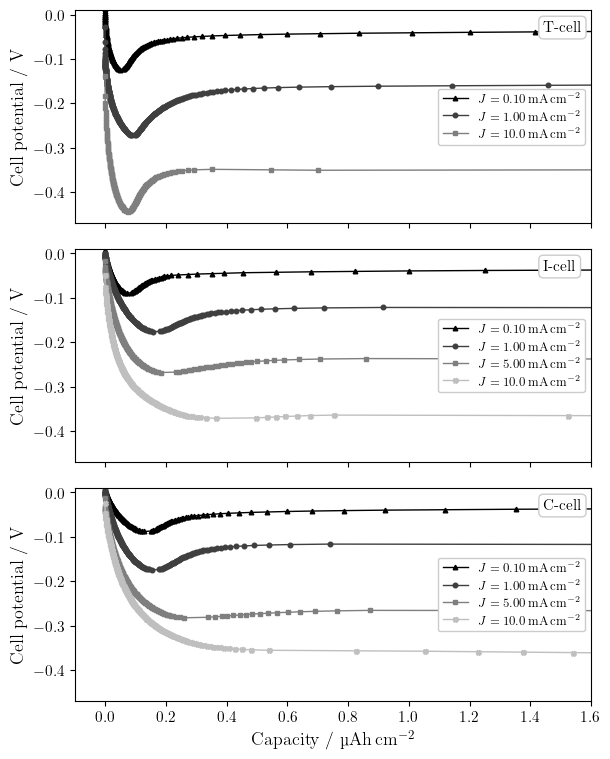

In [113]:
# PLOT for each cell type, plot different curves V vs. t  #
# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(fig_width_cm/2.54, 2.2*fig_height_cm/2.54), sharex=True, sharey=False)

mAcm2_unit = '$mA\\,cm$^{-2}$'
J01_string = '$J=0.10\\,' + mAcm2_unit
J1_string  = '$J=1.00\\,' + mAcm2_unit
J5_string  = '$J=5.00\\,' + mAcm2_unit
J10_string = '$J=10.0\\,' + mAcm2_unit

# Plot your data (axs.plot, .errorbar, .hist, ...) # ''Ax_CP = [t, V, I, error]''
# T-cell
axs[0].plot(A1_CP_deposited_amount,  A1_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=J01_string)
axs[0].plot(A2_CP_deposited_amount,  A2_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label=J1_string)
axs[0].plot(A3_CP_deposited_amount,  A3_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label=J10_string)

# M-cell
axs[1].plot(A4_CP_deposited_amount,  A4_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=J01_string)
axs[1].plot(A5_CP_deposited_amount,  A5_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label=J1_string)
axs[1].plot(A55_CP_deposited_amount, A55_CP[1],  linewidth=1, linestyle='-', color=four_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label=J5_string)
axs[1].plot(A6_CP_deposited_amount,  A6_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[3], marker=markers[3], markersize=marker_sizes[3], label=J10_string)
#axs[1].plot(A9_CP_lower_sigma_deposited_amount, A9_CP_lower_sigma[1],   linewidth=1, linestyle='-', color='k', marker='s', markersize='3.50', label='lower sigma')

# C-cell
axs[2].plot(A7_CP_deposited_amount,  A7_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=J01_string)
axs[2].plot(A8_CP_deposited_amount,  A8_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label=J1_string)
axs[2].plot(A85_CP_deposited_amount, A85_CP[1],  linewidth=1, linestyle='-', color=four_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label=J5_string)
axs[2].plot(A9_CP_deposited_amount,  A9_CP[1],   linewidth=1, linestyle='-', color=four_grayscale_colors[3], marker=markers[3], markersize=marker_sizes[3], label=J10_string)


# Settings for each axis (ax)
x_pos, y_pos = 0.9075, 0.9 # for textbox in axis-coordinates (0 to 1, in x and y)
cell_type_strings = ['T-cell', 'I-cell', 'C-cell']
for i, ax in enumerate(axs):
    f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
    f.set_axis_scale(   ax, xScale_string='linear', yScale_string='linear')
    if i==len(axs)-1:
        f.set_axis_labels(  ax, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
    else:
        f.set_axis_labels(  ax, x_label='', y_label='Cell potential / V')
    f.set_axis_invert(  ax, x_invert=False, y_invert=False)
    f.set_axis_limits(  ax, xmin=-0.0001*1000, xmax=0.0016*1000, ymin=-0.47, ymax=0.01) #xmax=0.501, ymin=-0.451
    f.set_grid(         ax, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
    f.set_legend(       ax, legend_on=legend_on, alpha=1.0, location='center right')
    ax.text(x_pos, y_pos, cell_type_strings[i], transform=ax.transAxes, bbox=standard_text_box_settings, fontsize=font_size_tick) 

f.align_labels(fig)
f.set_layout_tight(fig)

PDF_path_JP_V_vs_C_different_J_one_cell_type_per_subplot = electrochemical_figures_export_root_path + 'JP-measurements\\Deposition_V-vs-C_function-of-J_cell-type-per-subplot_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_JP_V_vs_C_different_J_one_cell_type_per_subplot)
print('\nDifferent $J$ for different cell types, all \\sigma=0.02 (except T-cell, J=0.1, for which sigma=0.10)')
plt.show()

DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.14, 0.01) on axs: None
DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.3, 0.01) on axs: None
DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.5, 0.01) on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, lower right, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, lower right, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on ax

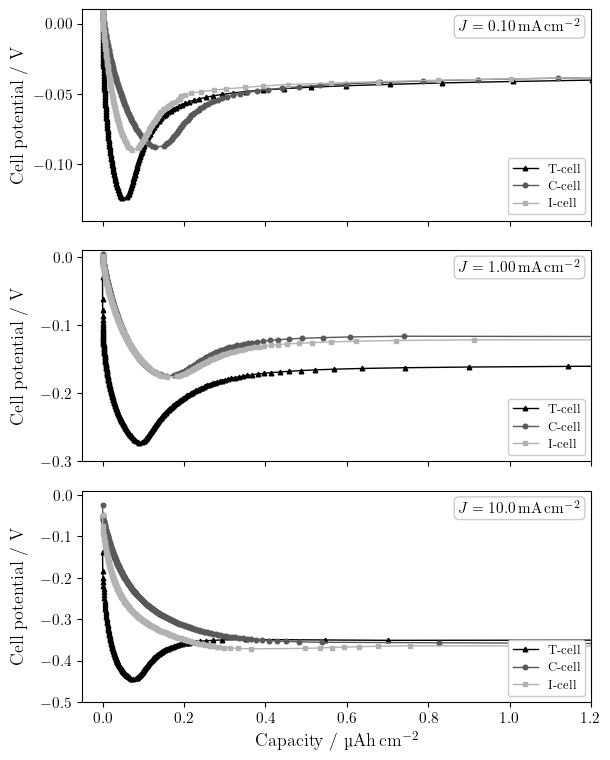

In [114]:
# PLOT: for each current density, plot curves for different cell types #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(fig_width_cm/2.54, 2.2*fig_height_cm/2.54), sharex=True, sharey=False)

T_cell_string = 'T-cell'
C_cell_string = 'C-cell'
M_cell_string = 'I-cell' #changed from M to I in the report

# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
# plot in wierd "Ax"-order to get better marker for the cell types in legend (trust me, this is better)
axs[0].plot(A1_CP_deposited_amount, A1_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=T_cell_string)
axs[0].plot(A7_CP_deposited_amount, A7_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[0], label=C_cell_string)
axs[0].plot(A4_CP_deposited_amount, A4_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[0], label=M_cell_string)

axs[1].plot(A2_CP_deposited_amount, A2_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=T_cell_string)
axs[1].plot(A8_CP_deposited_amount, A8_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[0], label=C_cell_string)
axs[1].plot(A5_CP_deposited_amount, A5_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[0], label=M_cell_string)

axs[2].plot(A3_CP_deposited_amount, A3_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=T_cell_string)
axs[2].plot(A9_CP_deposited_amount, A9_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[0], label=C_cell_string)
axs[2].plot(A6_CP_deposited_amount, A6_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[0], label=M_cell_string)


# Settings for each axis (axs)
nucleation_axis_limits = True
growth_plateau_axis_limits = True
axis_limits_string = None
if nucleation_axis_limits:
    f.set_axis_limits(  axs[0], xmin=-0.05, xmax=1.2, ymin=-0.14, ymax=0.01)
    f.set_axis_limits(  axs[1], xmin=-0.05, xmax=1.2, ymin=-0.3, ymax=0.01)
    f.set_axis_limits(  axs[2], xmin=-0.05, xmax=1.2, ymin=-0.5, ymax=0.01)
    axis_limits_string = 'nucleation_'
elif growth_plateau_axis_limits:
    f.set_axis_limits(  axs[0], xmin=-0.05, xmax=100, ymin=-0.14, ymax=0.01)
    f.set_axis_limits(  axs[1], xmin=-0.05, xmax=100, ymin=-0.3, ymax=0.01)
    f.set_axis_limits(  axs[2], xmin=-0.05, xmax=100, ymin=-0.5, ymax=0.01)
    axis_limits_string = 'growth-plateau_'


# Settings for each axis (ax)
x_pos, y_pos = 0.74, 0.9 # for textbox in axis-coordinates (0 to 1, in x and y)
for i, ax in enumerate(axs):
    J_strings = ['$J=0.10\\,$mA\\,cm$^{-2}$', '$J=1.00\\,$mA\\,cm$^{-2}$', '$J=10.0\\,$mA\\,cm$^{-2}$']
    f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
    f.set_axis_scale(   ax, xScale_string='linear', yScale_string='linear')
    if i==len(axs)-1:
        f.set_axis_labels(  ax, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
    else:
        f.set_axis_labels(  ax, x_label='', y_label='Cell potential / V')
    f.set_axis_invert(  ax, x_invert=False, y_invert=False)
    f.set_grid(         ax, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
    f.set_legend(       ax, legend_on=legend_on, alpha=1.0, location='lower right')
    ax.text(x_pos, y_pos, J_strings[i], transform=ax.transAxes, bbox=standard_text_box_settings, fontsize=font_size_tick) # rgba = (red, green, blue, alpha), '#CCCCCC' is the same as the legend edgecolor

f.align_labels(fig)
f.set_layout_tight(fig)
PDF_path_JP_V_vs_C_different_celltypes_one_J_per_subplot = electrochemical_figures_export_root_path + 'JP-measurements\\Deposition_V-vs-C_function-of-cell-type_one-J-per-subplot_' + axis_limits_string + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_JP_V_vs_C_different_celltypes_one_J_per_subplot)
print('\nDifferent celltypes for different $J$, all \\sigma=0.02 (except T-cell, J=0.1, for which sigma=0.10)')
plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.45, 0.01) on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: align_labels
DONE: set_layout_tight
DONE: export_figure_as_pdf: C:\MASTER-THESIS\FIGURES\Electrochemical-plots\JP-measurements\Deposition_V-vs-C_C-cell_same-I-cutoff-392nA_different-J_20240603T151656.pdf


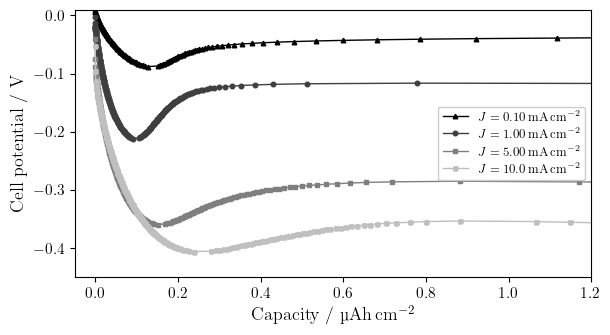

In [115]:
# Plot C-cell deposition for same I_SEI-cutoff = 392 nA #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

mAcm2_unit = '$mA\\,cm$^{-2}$'
J01_string = '$J=0.10\\,' + mAcm2_unit
J1_string  = '$J=1.00\\,' + mAcm2_unit
J5_string  = '$J=5.00\\,' + mAcm2_unit
J10_string = '$J=10.0\\,' + mAcm2_unit

# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(A7_392nAcutoff_CP_deposited_amount,   A7_392nAcutoff_CP[1], linewidth=1, linestyle='-', color=four_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label=J01_string)
axs.plot(A8_392nAcutoff_CP_deposited_amount,   A8_392nAcutoff_CP[1], linewidth=1, linestyle='-', color=four_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label=J1_string)
axs.plot(A85_392nAcutoff_CP_deposited_amount, A85_392nAcutoff_CP[1], linewidth=1, linestyle='-', color=four_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label=J5_string)
axs.plot(A9_392nAcutoff_CP_deposited_amount,   A9_392nAcutoff_CP[1], linewidth=1, linestyle='-', color=four_grayscale_colors[3], marker=markers[3], markersize=marker_sizes[3], label=J10_string)

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
f.set_axis_limits(  axs, xmin=-0.05, xmax=1.2, ymin=-0.45, ymax=0.01)
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.align_labels(fig)
f.set_layout_tight(fig)
PDF_path_Li_deposition_same_Icutoff392nA_different_J = electrochemical_figures_export_root_path + 'JP-measurements\\Deposition_V-vs-C_C-cell_same-I-cutoff-392nA_different-J_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_Li_deposition_same_Icutoff392nA_different_J)

plt.show()


DONE: set_font_size: (axis, tick, legend): 13, 11, 6.75
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.445, 0.01) on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, upper right, on axs: None
DONE: align_labels
DONE: set_layout_tight
DONE: export_figure_as_pdf: C:\MASTER-THESIS\FIGURES\Electrochemical-plots\JP-measurements\Deposition_V-vs-C_C-cell_same-I-cutoff-392nA_vs_same-sigma0.02_different-J_20240603T151700.pdf


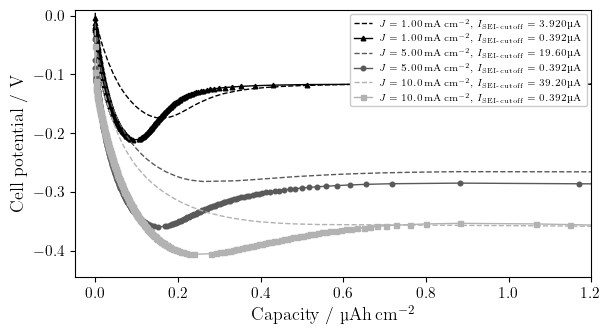

In [116]:
# Plot C-cell deposition for same I_SEI-cutoff = 392 nA vs. different I_SEI-cutoff #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

mAcm2_unit = '$mA\\,cm$^{-2}$' #mAcm2_unit = '$' #
J01_string = '$J=0.10\\,' + mAcm2_unit
J1_string  = '$J=1.00\\,' + mAcm2_unit
J5_string  = '$J=5.00\\,' + mAcm2_unit
J10_string = '$J=10.0\\,' + mAcm2_unit

Ideposition_labels = ["$I_\\mathrm{deposition}=196$\\,\\textmu A", 
                     "$I_\\mathrm{deposition}=980$\\,\\textmu A", 
                     "$I_\\mathrm{deposition}=1960$\\,\\textmu A"] #J=1, 5, 10 mA/cm2

# cutoffs for sigma=0.02
muA_unit = '\\textmu A' #muA_unit = '' #
I_cutoff_392nA_string = '$I_\\mathrm{SEI\\textrm{-}cutoff}=0.392$\\,' + muA_unit
I_cutoff_A7_string  = I_cutoff_392nA_string
I_cutoff_A8_string  = '$I_\\mathrm{SEI\\textrm{-}cutoff}=3.920$\\,' + muA_unit
I_cutoff_A85_string = '$I_\\mathrm{SEI\\textrm{-}cutoff}=19.60$\\,' + muA_unit  
I_cutoff_A9_string  = '$I_\\mathrm{SEI\\textrm{-}cutoff}=39.20$\\,' + muA_unit


# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(A8_CP_deposited_amount,   A8_CP[1],                         linewidth=1, linestyle='--', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[1]*0, label= J1_string + ', ' + I_cutoff_A8_string)
axs.plot(A8_392nAcutoff_CP_deposited_amount,   A8_392nAcutoff_CP[1], linewidth=1, linestyle='-',  color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[1], label=J1_string + ', ' + I_cutoff_392nA_string)

axs.plot(A85_CP_deposited_amount, A85_CP[1],                         linewidth=1, linestyle='--', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[2]*0, label=J5_string + ', ' + I_cutoff_A85_string)
axs.plot(A85_392nAcutoff_CP_deposited_amount, A85_392nAcutoff_CP[1], linewidth=1, linestyle='-',  color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[2], label=J5_string + ', ' + I_cutoff_392nA_string)

axs.plot(A9_CP_deposited_amount,   A9_CP[1],                         linewidth=1, linestyle='--', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[3]*0, label=J10_string + ', ' + I_cutoff_A9_string)
axs.plot(A9_392nAcutoff_CP_deposited_amount,   A9_392nAcutoff_CP[1], linewidth=1, linestyle='-',  color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[3], label=J10_string + ', ' + I_cutoff_392nA_string)


# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend*0.75)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
f.set_axis_limits(  axs, xmin=-0.05, xmax=1.2, ymin=-0.445, ymax=0.01) # xmax=100, ymin=-0.55, ymax=0.01) 
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='upper right')

f.align_labels(fig)
f.set_layout_tight(fig)
PDF_path_Li_deposition_same_Icutoff392nA_different_J_comparison = electrochemical_figures_export_root_path + 'JP-measurements\\Deposition_V-vs-C_C-cell_same-I-cutoff-392nA_vs_same-sigma0.02_different-J_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_Li_deposition_same_Icutoff392nA_different_J_comparison)
plt.show()


In [117]:
# Paths for data E-measurements #

# CP #
E_Ionic_CP_path = E_root_path + C_cell_path + '2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt'
E_LiPF6_CP_path = E_root_path + C_cell_path + '2024-05-01_E-measurements_sample-LiPF6-02_C-cell_Cu-Li_Cellgard2400_25muL-LiPF6-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt' #'2024-04-25_E-measurements_sample-LiPF6-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiPF6_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt'
E_LiFSI_CP_path = E_root_path + C_cell_path + '2024-04-25_E-measurements_sample-LiFSI-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt'

E_Ionic_CP = get_t_V_I_error_from_Biologic_file_root_path(E_Ionic_CP_path, shift_t_to_zero=True)
E_LiPF6_CP = get_t_V_I_error_from_Biologic_file_root_path(E_LiPF6_CP_path, shift_t_to_zero=True)
E_LiFSI_CP = get_t_V_I_error_from_Biologic_file_root_path(E_LiFSI_CP_path, shift_t_to_zero=True)


# MB #
E_Ionic_MB_path = E_root_path + C_cell_path + '2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C01.txt'
E_LiPF6_MB_path = E_root_path + C_cell_path + '2024-05-01_E-measurements_sample-LiPF6-02_C-cell_Cu-Li_Cellgard2400_25muL-LiPF6-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C01.txt' #'2024-04-25_E-measurements_sample-LiPF6-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiPF6_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C02.txt'
E_LiFSI_MB_path = E_root_path + C_cell_path + '2024-04-25_E-measurements_sample-LiFSI-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C02.txt'

E_Ionic_MB = get_t_V_I_error_from_Biologic_file_root_path(E_Ionic_MB_path, shift_t_to_zero=True)
E_LiPF6_MB = get_t_V_I_error_from_Biologic_file_root_path(E_LiPF6_MB_path, shift_t_to_zero=True)
E_LiFSI_MB = get_t_V_I_error_from_Biologic_file_root_path(E_LiFSI_MB_path, shift_t_to_zero=True)

# Deposition capacity from I and t #
E_Ionic_CP_desposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(E_Ionic_CP[0], E_Ionic_CP[2])*1000 #muAh/cm2
E_LiPF6_CP_desposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(E_LiPF6_CP[0], E_LiPF6_CP[2])*1000 #muAh/cm2
E_LiFSI_CP_desposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(E_LiFSI_CP[0], E_LiFSI_CP[2])*1000 #muAh/cm2


DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\cell-cycling\E-measurements\C-cell\2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\cell-cycling\E-measurements\C-cell\2024-05-01_E-measurements_sample-LiPF6-02_C-cell_Cu-Li_Cellgard2400_25muL-LiPF6-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\cell-cycling\E-measurements\C-cell\2024-04-25_E-measurements_sample-LiFSI-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\cell-cycling\E-measurements\C-cell\2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C01.txt
DONE: Reading C

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_limits: x=(-0.16666666666666666, 21.666666666666668) and y=(-500.0, 10.0) on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, lower left, on axs: None
DONE: align_labels
DONE: set_layout_tight


c:\MASTER-THESIS\EXPERIMENTAL\Python-scripts\plot_functions.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


DONE: export_figure_as_pdf: C:\MASTER-THESIS\FIGURES\Electrochemical-plots\E-measurements\SEI-formation_I-vs-t_C-cell_different-electrolytes_20240603T151707.pdf


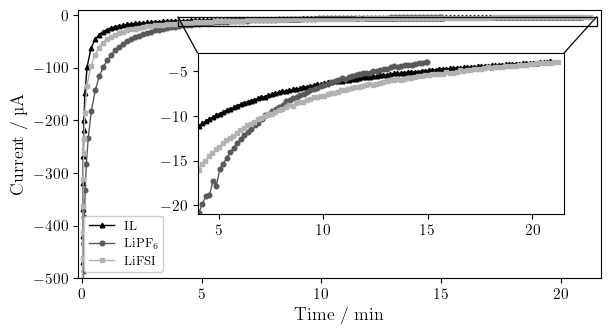

In [118]:
# PLOT: plot I_sei for different electrolytes #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)
#f.set_title('C-cell, SEI-formation')

time_divider = 60 # s --> min
current_multiplier = 1000 # mA --> muA
first_datapoint_remover = 1

# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(E_Ionic_MB[0][first_datapoint_remover:-1]/time_divider, E_Ionic_MB[2][first_datapoint_remover:-1]*current_multiplier,
         linewidth=1, linestyle='-', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label='IL')
axs.plot(E_LiPF6_MB[0][first_datapoint_remover:-1]/time_divider, E_LiPF6_MB[2][first_datapoint_remover:-1]*current_multiplier,
         linewidth=1, linestyle='-', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[0], label='LiPF$_6$')
axs.plot(E_LiFSI_MB[0][first_datapoint_remover:-1]/time_divider, E_LiFSI_MB[2][first_datapoint_remover:-1]*current_multiplier,
         linewidth=1, linestyle='-', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[0], label='LiFSI')

# plot inset (zoom)
ax_inset = inset_axes(axs, width="100%", height="100%", bbox_to_anchor=(.22, .22, .70, .60), bbox_transform=axs.transAxes, loc=3)# loc=(0.5,0.5))#"lower center")
ax_inset.plot(E_Ionic_MB[0][first_datapoint_remover:-1]/time_divider, E_Ionic_MB[2][first_datapoint_remover:-1]*current_multiplier,
              linewidth=1, linestyle='-', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label='IL')
ax_inset.plot(E_LiPF6_MB[0][first_datapoint_remover:-1]/time_divider, E_LiPF6_MB[2][first_datapoint_remover:-1]*current_multiplier,
              linewidth=1, linestyle='-', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label='LiPF$_6$')
ax_inset.plot(E_LiFSI_MB[0][first_datapoint_remover:-1]/time_divider, E_LiFSI_MB[2][first_datapoint_remover:-1]*current_multiplier,
              linewidth=1, linestyle='-', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label='LiFSI')

xmin_inset, xmax_inset, ymin_inset, ymax_inset = 240/time_divider, 1290/time_divider, -0.021*current_multiplier, -0.003*current_multiplier
ax_inset.set_xlim(xmin_inset, xmax_inset)
ax_inset.set_ylim(ymin_inset, ymax_inset)


# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / min', y_label='Current / \\textmu A')
f.set_axis_limits(  axs, xmin=-10/time_divider, xmax=1300/time_divider, ymin=-0.5*current_multiplier, ymax=0.01*current_multiplier)
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
#f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_grid(         ax_inset, grid_major_on=False, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='lower left')

f.align_labels(fig)
f.set_layout_tight(fig)

mark_inset(axs, ax_inset, loc1=2, loc2=1, facecolor="none", edgecolor="0.05", linewidth=0.95, zorder=100)
axs.xaxis.set_major_locator(plticker.MultipleLocator(base=5))# this locator puts ticks at regular intervals determined by base
ax_inset.yaxis.set_major_locator(plticker.MultipleLocator(base=5))# this locator puts ticks at regular intervals determined by base
ax_inset.xaxis.set_major_locator(plticker.MultipleLocator(base=5))# this locator puts ticks at regular intervals determined by base

PDF_path_SEI_formation_different_electrolytes = electrochemical_figures_export_root_path + 'E-measurements\\SEI-formation_I-vs-t_C-cell_different-electrolytes_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_SEI_formation_different_electrolytes)

plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_limits: x=(-0.05, 1.2) and y=(-0.27, 0.01) on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: align_labels
DONE: set_layout_tight
DONE: export_figure_as_pdf: C:\MASTER-THESIS\FIGURES\Electrochemical-plots\E-measurements\Deposition_V-vs-C_C-cell_different-electrolytes_20240603T151712.pdf

C-cell, $J=1.00\,$mA\,cm$^{-2}$


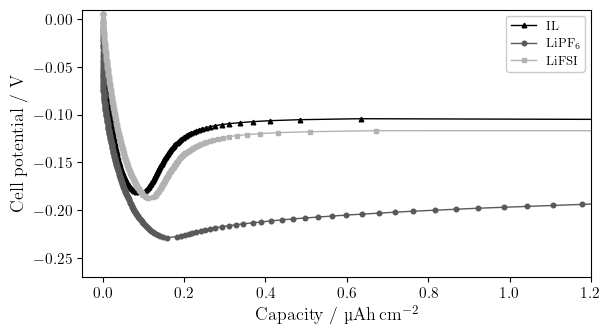

In [119]:
# PLOT: plot V vs. C for different electrolytes #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(E_Ionic_CP_desposited_amount, E_Ionic_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[0], marker=markers[0], markersize=marker_sizes[0], label='IL')
axs.plot(E_LiPF6_CP_desposited_amount, E_LiPF6_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[1], marker=markers[1], markersize=marker_sizes[1], label='LiPF$_6$')
axs.plot(E_LiFSI_CP_desposited_amount, E_LiFSI_CP[1], linewidth=1, linestyle='-', color=three_grayscale_colors[2], marker=markers[2], markersize=marker_sizes[2], label='LiFSI')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
f.set_axis_limits(  axs, xmin=-0.05, xmax=1.2, ymin=-0.27, ymax=0.01)
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.align_labels(fig)
f.set_layout_tight(fig)
PDF_path_Li_deposition_different_electrolytes = electrochemical_figures_export_root_path + 'E-measurements\\Deposition_V-vs-C_C-cell_different-electrolytes_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
f.export_figure_as_pdf(PDF_path_Li_deposition_different_electrolytes)

print('\nC-cell, $J=1.00\\,$mA\\,cm$^{-2}$')
plt.show()